# Assignment 4 - Data Cleansing and Visualization 

1.) Import and clean the attached CSCI_1070_survey_results.csv Download CSCI_1070_survey_results.csv about your classmates using Python (pandas)

In [35]:
import pandas as pd
import numpy as np

survey_df = pd.read_csv('CSCI_1070_survey_results-2.csv')

1a.) Standardize the names of places where everyone is from

In [36]:
survey_df['birth_countries_standardized'] = np.where(survey_df['What state/country were you born in?'].str.contains('Libya'), 'Libya',
                                            np.where(survey_df['What state/country were you born in?'].str.contains('India'), 'India',
                                                     np.where(survey_df['What state/country were you born in?'].str.contains('Saudi Arabia'), 'Saudi Arabia','USA')))
survey_df['birth_countries_standardized']

0              USA
1              USA
2              USA
3              USA
4              USA
5              USA
6              USA
7     Saudi Arabia
8              USA
9            India
10             USA
11             USA
12             USA
13             USA
14             USA
15             USA
16             USA
17             USA
18           Libya
19             USA
Name: birth_countries_standardized, dtype: object

1b.) Standardize the pets in some way (this one will be tricky)

In [37]:
survey_df['pets_standardized'] = np.where(survey_df['How many pets and of which kind do you have?'].str.contains('None'), '0',
                                          np.where(survey_df['How many pets and of which kind do you have?'].str.contains('No'), '0',
                                                   np.where(survey_df['How many pets and of which kind do you have?'].str.contains('none'), '0',
                                                            np.where(survey_df['How many pets and of which kind do you have?'].str.contains('0'), '0',
                                                                     np.where(survey_df['How many pets and of which kind do you have?'].str.contains('passed'), '0',
                                                                              survey_df['How many pets and of which kind do you have?'])))))
survey_df['pets_standardized']

0                 I have two dogs both chihuahua mixes.
1                                                     0
2     I have two golden retrievers, Ellie and Amber....
3                                                     0
4                                                     0
5                                                     0
6                                                     0
7                                                     0
8                                                     0
9                                                     0
10                       We have a Husky named Maverick
11                                                    0
12                            2 miniature daschund dogs
13                                                    0
14                                           1 Maincoon
15                                                    0
16                                                    0
17                                              

1c.) Standardize the favorite food in some way (this one will also be tricky) 

In [38]:
survey_df['food_standardized'] = np.where(survey_df['What is your favorite type of food?'] == 'pasta', 'Pasta',
                                          np.where(survey_df['What is your favorite type of food?'] == 'PASTAAAAA', 'Pasta',
                                                   np.where(survey_df['What is your favorite type of food?'].str.contains('Pasta'), 'Pasta',
                                                            survey_df['What is your favorite type of food?'])))
survey_df['food_standardized']

0                                           Pasta
1                                       Hot wings
2                                        Mexican.
3                                      Vietnamese
4                                           Pasta
5                                          injera
6                                           Pasta
7                                          Kabsa 
8                                    Gambian Food
9                                         Italian
10    some sort of steak, probably a filet mignon
11                          Burgers (blue cheese)
12                                grilled chicken
13                                          Pasta
14                                         salmon
15                        I don't have a favorite
16                                          Pasta
17                           mexican/middleastern
18                                       Brownies
19                                 Pizza or Steak


1d.) Standardize the majors

In [39]:
survey_df['majors_standardized'] = np.where(survey_df['What is your major?'].str.contains('omp'), 'Computer Science',
                                            np.where(survey_df['What is your major?'] == 'CS', 'Computer Science',
                                                     np.where(survey_df['What is your major?'] == 'Data Science ', 'Data Science',
                                                              np.where(survey_df['What is your major?'] == 'data science', 'Data Science',
                                                                       survey_df['What is your major?'].str.replace('.', '')))))

survey_df['majors_standardized']

0                                          Data Science
1                                               Nursing
2                                 Economics and Finance
3                                          Biochemistry
4                                       Health Sciences
5                                      Computer Science
6                                      Computer Science
7     Criminology and Criminal Justice and I am plan...
8                                      Computer Science
9                                               Finance
10                                          Mathematics
11                   International Business (Graduated)
12                                     Computer Science
13                                     Computer Science
14                                         Data Science
15                                     Forensic Science
16                                     Computer Science
17                                         Data 

1e.) Standardize the ages

In [40]:
survey_df['ages_standardized'] = np.where(survey_df['How old are you?'].str.contains('19'), '19',
                                          np.where(survey_df['How old are you?'].str.contains('18'), '18', 
                                                   survey_df['How old are you?']))
survey_df['ages_standardized']

0     18
1     19
2     19
3     18
4     18
5     19
6     18
7     19
8     18
9     21
10    19
11    22
12    18
13    19
14    20
15    18
16    21
17    19
18    18
19    18
Name: ages_standardized, dtype: object

2.) Create 5 matplotlib or pandas visuals that represent the data. You must use at least 3 different types of visuals (pie chart, scatter plot, histogram, etc) and use proper labeling of axis and data. Write a sentence about what each visual shows about the students in the class.

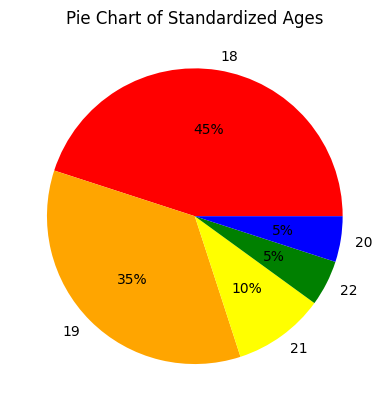

In [41]:
import matplotlib.pyplot as plt

ages_standardized_counts = survey_df['ages_standardized'].value_counts()
colors = ['red', 'orange', 'yellow', 'green', 'blue']
ages_standardized_counts.plot(kind = 'pie', autopct = '%1.0f%%', colors = colors)
plt.title("Pie Chart of Standardized Ages")
plt.ylabel("")
plt.show()

This pie chart shows that the dominant ages of the class are 18——with 45%——and 19——with 35%.

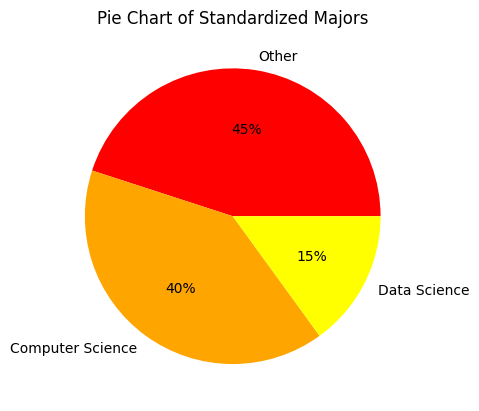

In [42]:
other_majors = ['Nursing', 'Economics and Finance', 'Biochemistry', 'Health Sciences', 'Criminology and Criminal Justice and I am planing to have a minor in CS', 'Finance', 'Mathematics', 'International Business (Graduated)', 'Forensic Science']
survey_df['majors_standardized'] = survey_df['majors_standardized'].apply(lambda x: 'Other' if x in other_majors else x)
majors_standardized_counts = survey_df['majors_standardized'].value_counts()
colors = ['red', 'orange', 'yellow']
majors_standardized_counts.plot(kind = 'pie', autopct = '%1.0f%%', colors = colors)
plt.title("Pie Chart of Standardized Majors")
plt.ylabel("")
plt.show()

This visual shows that the Data and Computer Science majors compose 55% of class, while other majors compose the other 45%.

Text(0.5, 1.0, 'Bar Chart of Standardized Birthplaces')

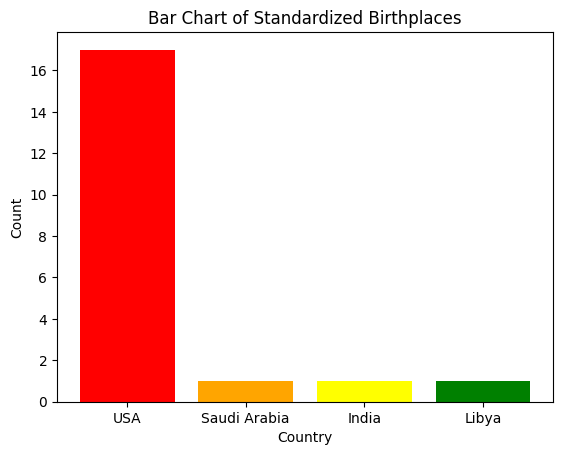

In [43]:
birth_countries_standardized_counts = survey_df['birth_countries_standardized'].value_counts()
plt.bar(birth_countries_standardized_counts.index, birth_countries_standardized_counts.values, color=['red', 'orange', 'yellow', 'green'])
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Bar Chart of Standardized Birthplaces")

This visual shows us that the vast majority of students in the class are from the USA.

Text(0.5, 1.0, 'Bar Chart of Class Level')

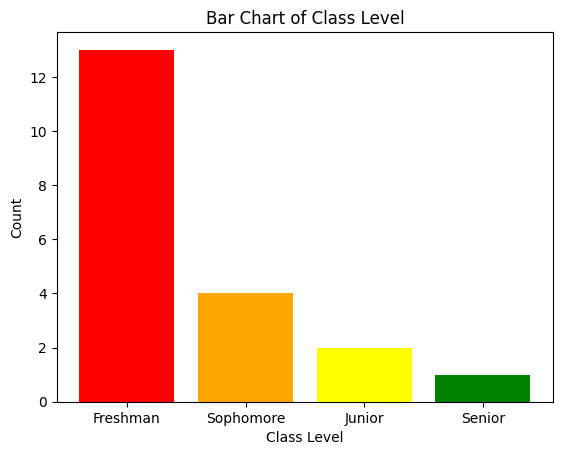

In [44]:
class_level_counts = survey_df['What class are you in?'].value_counts()
plt.bar(class_level_counts.index, class_level_counts.values, color=['red', 'orange', 'yellow', 'green'])
plt.xlabel("Class Level")
plt.ylabel("Count")
plt.title("Bar Chart of Class Level")

This visual shows that most of this class is freshmen, followed by sophomores, juniors, and seniors at far reduced intervals.

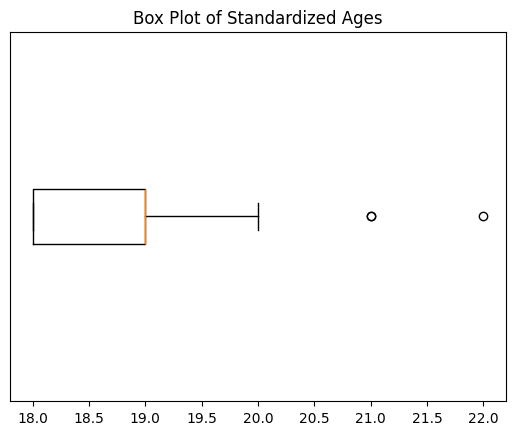

In [54]:
survey_df['ages_standardized'] = survey_df['ages_standardized'].astype(int)
plt.boxplot(survey_df['ages_standardized'], vert = False)
plt.title('Box Plot of Standardized Ages')
plt.yticks([])
plt.show()

This boxplot displays the same age data as earlier, except it also includes that the median age of the group is 18, confirming the statistics seen earlier. It also shows that the aged 21 and 22 students are outliers, given the left skew of 18-year olds in this dataset.